In [42]:
import os
import os.path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
#from matplotlib.image import imread
import skimage
from skimage.io import imread
import glob
from skimage import io
import pandas as pd
import warnings
from PIL import Image, ImageOps
import pathlib
import pickle
import csv
import cv2
import seaborn as sns
import seaborn_image as isns

In [43]:
def process_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = np.ravel(img)
    img = np.ravel(img) / 255.0
    return img


In [44]:
def process_folder(folder: pathlib.PosixPath) -> pd.DataFrame:
    # We'll store the images here
    processed = []
    
    # For every image in the directory
    for img in folder.iterdir():
        # Ensure PGM
        if img.suffix == '.pgm':
            try:
                processed.append(process_image(img_path=str(img)))
            except Exception as _:
                continue
           
    # Convert to pd.DataFrame
    processed = pd.DataFrame(processed)
    return processed


In [45]:
dataframe = process_folder(folder=pathlib.Path.cwd().joinpath('/Users/nishantabaral/Desktop/DataDriven Projects/CroppedYale/YaleB01'))


In [46]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 32256 entries, 0 to 32255
dtypes: float64(32256)
memory usage: 15.8 MB


In [48]:
images = []

for k in range(0,64):
    data =np.array(dataframe.iloc[k])
    picture=data.reshape(192,168)
    images.append(picture)
    

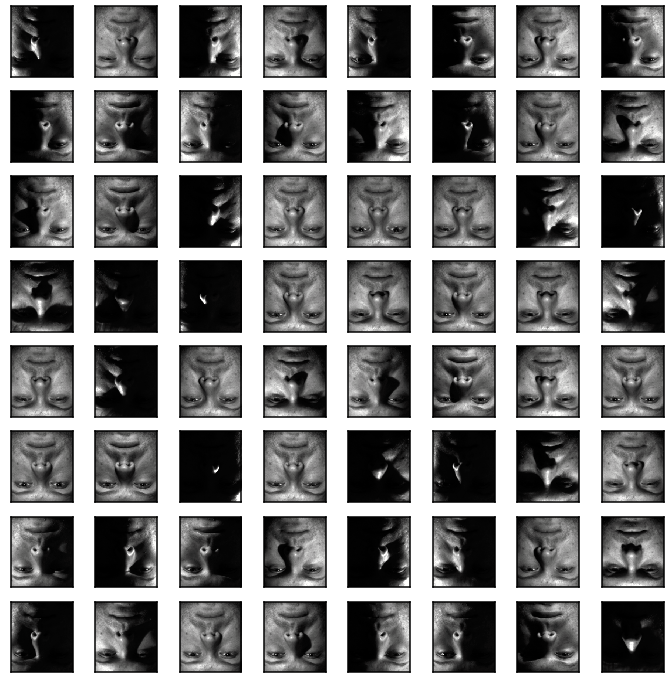

In [73]:
g = isns.ImageGrid(images,col_wrap=8,cmap ="gray",cbar=False,height=1.2)



In [50]:
dataframe1 = process_folder(folder=pathlib.Path.cwd().joinpath('Yale-36-pictures'))


In [53]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 32256 entries, 0 to 32255
dtypes: float64(32256)
memory usage: 8.9 MB


In [56]:
images1 = []

for k in range(0,36):
    data =np.array(dataframe1.iloc[k])
    picture=data.reshape(192,168)
    images1.append(picture)
    

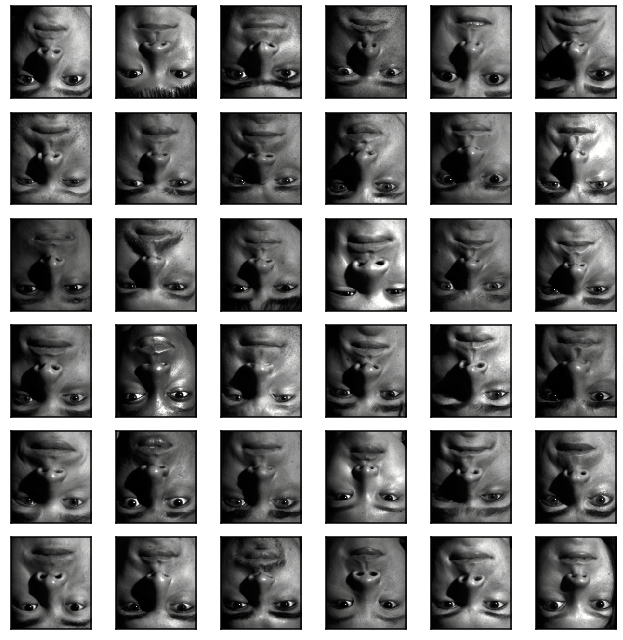

In [70]:
g = isns.ImageGrid(images1,col_wrap=6,cmap ="gray",cbar=False,height=1.5)
